## Classificaton Models

### Definition

In Machine Learning a classification model tries to draw some conclusion from the input values given for training.
It will predict the class labels/categories for the new data.
The data set may simply be bi-class (like identifying whether the person is male or female or that the mail is spam or non-spam) or it may be multi-class too. Some examples of classification problems are: speech recognition, handwriting recognition, bio metric identification, document classification etc.



## Data set Information

I am using the Glass Dataset which consists of 214 rows,11 columns and 2354 observations.
The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



## Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)<br>
-- 1 building_windows_float_processed <br>
-- 2 building_windows_non_float_processed  <br>
-- 3 vehicle_windows_float_processed  <br>
-- 4 vehicle_windows_non_float_processed (none in this database)  <br>
-- 5 containers  <br>
-- 6 tableware  <br>
-- 7 headlamps  <br>



In [1]:
#Importing the necesserary Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
df=pd.read_csv("D:\\ML_Datasets\\Glass\\glass.csv")

In [3]:
# Preview the data
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeof_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Exploratory Data Analysis

In [4]:
# Shape of the data i.e, no of rows and columns
df.shape

(214, 11)

Glass dataset contains 214 rows and 11 columns

In [5]:
#data information  i.e, data types of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
Id              214 non-null int64
RI              214 non-null float64
Na              214 non-null float64
Mg              214 non-null float64
Al              214 non-null float64
Si              214 non-null float64
K               214 non-null float64
Ca              214 non-null float64
Ba              214 non-null float64
Fe              214 non-null float64
Typeof_glass    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
# Description of the data
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Typeof_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# checking missing values in the dataset
df.isnull().sum()

Id              0
RI              0
Na              0
Mg              0
Al              0
Si              0
K               0
Ca              0
Ba              0
Fe              0
Typeof_glass    0
dtype: int64

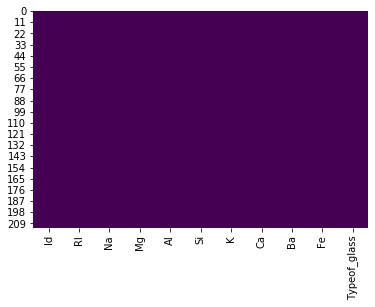

In [8]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")

There is no missing values in the dataset

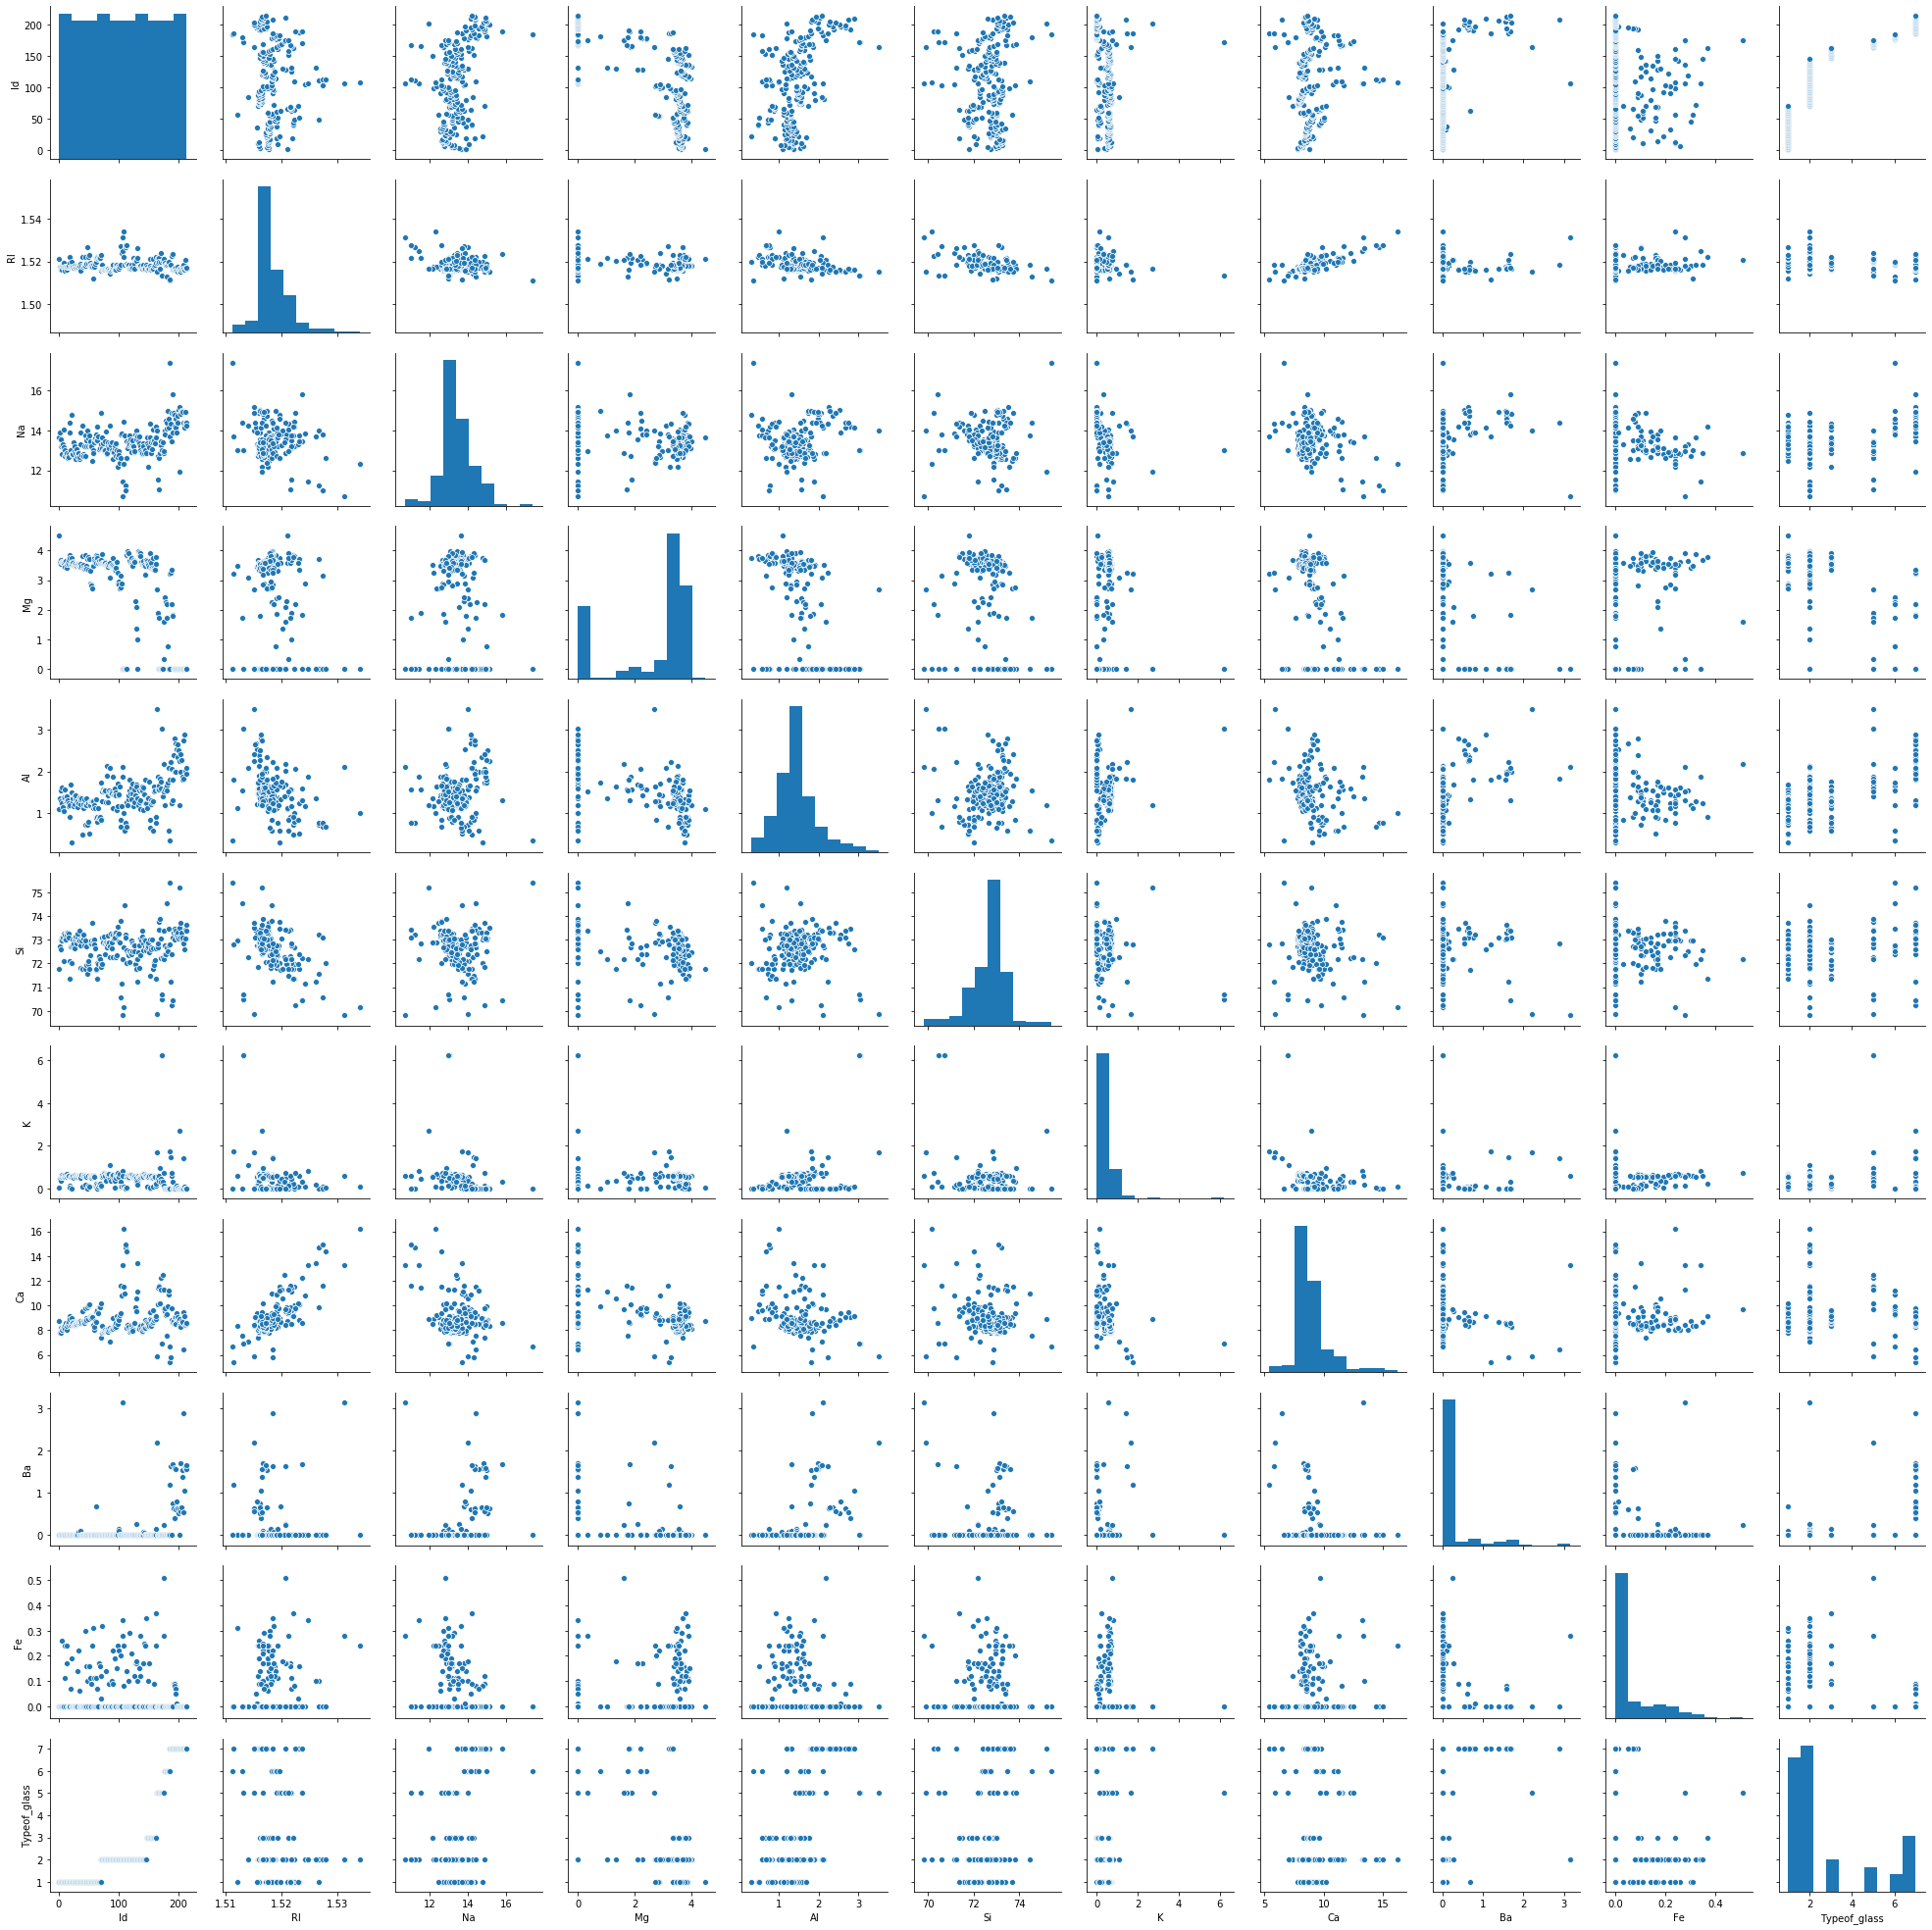

In [9]:
sns.pairplot(df)

In [10]:
corr=df.corr()

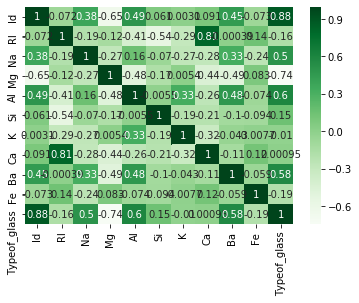

<Figure size 720x720 with 0 Axes>

In [11]:
sns.heatmap(corr,annot=True,cmap="Greens")
plt.figure(figsize=(15,15))
plt.show()

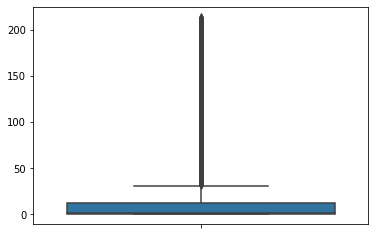

In [12]:
# For checking of outliers in the dataset
sns.boxplot(df,orient='v')

 In the above diagram we see that there are so many outliers.so we have to normalize the dataset.
 Normalization means to scale a variable to have a values between 0 and 1,

#### Assigning the dataset to the x and y variables

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
# sample of x and y variables
print(x.sample(2))
print(y.sample(2))

      Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
115  116  1.51846  13.41  3.89  1.33  72.38  0.51  8.28  0.0  0.0
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
173    5
180    6
Name: Typeof_glass, dtype: int64


#### Normalizing the datasset using formula X=(X-min(x)-max(X)-min(X))


In [15]:
x=((x-np.min(x))/((np.max(x)-np.min(x))))

In [16]:
# sample of x value after noramlization
print(x.shape)
print(x.sample(5))

(214, 10)
           Id        RI        Na        Mg        Al        Si         K  \
87   0.408451  0.232660  0.401504  0.777283  0.383178  0.507143  0.107890   
185  0.868545  0.007024  0.445113  0.712695  0.473520  0.535714  0.283414   
132  0.619718  0.306409  0.406015  0.886414  0.277259  0.478571  0.093398   
204  0.957746  0.220369  0.634586  0.000000  0.616822  0.623214  0.000000   
71   0.333333  0.321773  0.437594  0.861915  0.305296  0.383929  0.086957   

           Ca        Ba        Fe  
87   0.246283  0.000000  0.196078  
185  0.000000  0.377778  0.000000  
132  0.252788  0.000000  0.000000  
204  0.304833  0.212698  0.000000  
71   0.268587  0.000000  0.627451  


### Training the Algorithms

In [17]:
# spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 10)
(65, 10)
(149,)
(65,)


In [19]:
# Importing packages for fitting different models to the data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier



# Importing functions to get the model fitting for the data 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix  
from sklearn.model_selection import cross_val_score


In [20]:
# Fitting the all models
svc = SVC(kernel="rbf", random_state=0)
rfc = RandomForestClassifier(random_state=0)
dct=DecisionTreeClassifier(random_state=0)
nb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
sgd=SGDClassifier(loss='hinge',shuffle=True,random_state=0)
classifier=LogisticRegression(random_state=0)


classifier.fit(x_train,y_train)
svc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
nb.fit(x_train,y_train)
sgd.fit(x_train,y_train)
dct.fit(x_train,y_train)
knn.fit(x_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Making Predictions

In [21]:
#Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_rfc = rfc.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_dct = dct.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_sgd = sgd.predict(x_test)


#### Evaluating the Models

In [22]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm_svm = confusion_matrix(y_test,y_pred_svc)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_dct = confusion_matrix(y_test,y_pred_dct)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_sgd = confusion_matrix(y_test,y_pred_sgd)

print('***confusion matrix for multi Logistic Regression*** :')
print(cm)
print('***confusion matrix for SVM ***:')
print(cm_svm)
print('***confusion matrix for Decision Tree *** :')
print(cm_dct)
print('*** confusion matrix for Random Forest *** :')
print(cm_rfc)
print('*** confusion matrix for Naive Bayes *** :')
print(cm_nb)
print('*** confusion matrix for KNN *** :')
print(cm_knn)
print('*** confusion matrix for Stochastic Gradient Descent *** :')
print(cm_sgd)

***confusion matrix for multi Logistic Regression*** :
[[25  0  0  0  0  0]
 [ 1 18  0  0  0  2]
 [ 0  7  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  1]
 [ 0  1  0  0  0  8]]
***confusion matrix for SVM ***:
[[25  0  0  0  0  0]
 [ 0 20  0  0  0  1]
 [ 0  7  0  0  0  0]
 [ 0  1  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  9]]
***confusion matrix for Decision Tree *** :
[[24  1  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  1  0  0  8]]
*** confusion matrix for Random Forest *** :
[[25  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  2  5  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]
*** confusion matrix for Naive Bayes *** :
[[25  0  0  0  0  0]
 [ 1 18  1  0  0  1]
 [ 0  1  6  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  9]]
*** confusion matrix for KNN *** :
[[25  0  0  0  0  0]
 [ 0 20  0  1  0  0]
 [ 0  4  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0 

In [23]:
# Classification Report for all models
from sklearn.metrics import classification_report
print('classification Report for multi Logistic Regression:')
print(classification_report(y_test,y_pred))
print('classification Report for SVM :')
print(classification_report(y_test,y_pred_svc))
print('classification Report for Random Forest:')
print(classification_report(y_test,y_pred_rfc))
print('classification Report for Naive Bayes:')
print(classification_report(y_test,y_pred_nb))
print('classification Report for Decision Tree:')
print(classification_report(y_test,y_pred_dct))
print('classification Report for KNN:')
print(classification_report(y_test,y_pred_knn))
print('classification Report for Gradient Boosted Machine:')
print(classification_report(y_test,y_pred_sgd))

classification Report for multi Logistic Regression:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       0.69      0.86      0.77        21
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.62      0.89      0.73         9

    accuracy                           0.78        65
   macro avg       0.38      0.46      0.41        65
weighted avg       0.68      0.78      0.73        65

classification Report for SVM :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.71      0.95      0.82        21
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.75      1.00      0.86    

In [24]:
# Accuracy for all models
from sklearn import metrics
amlr = metrics.accuracy_score(y_test,y_pred)
asvc = metrics.accuracy_score(y_test,y_pred_svc)
arfc = metrics.accuracy_score(y_test,y_pred_rfc)
adct = metrics.accuracy_score(y_test,y_pred_dct)
aknn = metrics.accuracy_score(y_test,y_pred_knn)
asgd = metrics.accuracy_score(y_test,y_pred_sgd)
anb = amlr = metrics.accuracy_score(y_test,y_pred_nb)

print('Accuracy of the Multi class Logistic Regression:')
print(amlr)
print(' Accuracy of the SVM :')
print(asvc)
print(' Accuracy of the Random Forest :')
print(arfc)
print(' Accuracy of the Decision Tree :')
print(adct)
print('Accuracy of the KNN :')
print(aknn)
print('Accuracy of the Gradient Boosted Machine:')
print(asgd)
print(' Accuracy of the Naive Bayes :')
print(anb)

Accuracy of the Multi class Logistic Regression:
0.9384615384615385
 Accuracy of the SVM :
0.8307692307692308
 Accuracy of the Random Forest :
0.9538461538461539
 Accuracy of the Decision Tree :
0.9692307692307692
Accuracy of the KNN :
0.9076923076923077
Accuracy of the Gradient Boosted Machine:
0.8
 Accuracy of the Naive Bayes :
0.9384615384615385


In [25]:
accuracy_dict = {'MLR' : amlr, 'SVC' : asvc, 'RFC': arfc, 'DCT': adct, 'NB': anb, 'SGD': asgd, 'KNN' : aknn}
print('Max Accuracy', max(accuracy_dict.items(), key=lambda k: k[1]))
print('Min Accuracy', min(accuracy_dict.items(), key=lambda k: k[1]))

Max Accuracy ('DCT', 0.9692307692307692)
Min Accuracy ('SGD', 0.8)


### Conclusion

From the above all models  Decision Tree gives Maximum Accuracy i.e, 96% and Gradient boosted  gives minimum  Accuracy i.e,80%